# Table of Contents
 <p>

In [1]:
%matplotlib inline
# %matplotlib notebook

In [2]:
import matplotlib
import matplotlib.pyplot as plt

import phenom
import numpy as np

import lal
import lalsimulation as lalsim

In [3]:
from helpers import *

In [4]:
t0, hp0, hc0 = CallTDWaveform(approx="IMRPhenomPv2", chi1x=0., iota=0., eta=0.16, srate=2**10)
t1, hp1, hc1 = CallTDWaveform(approx="SEOBNRv3", chi1x=0., iota=0., eta=0.16, srate=2**10)

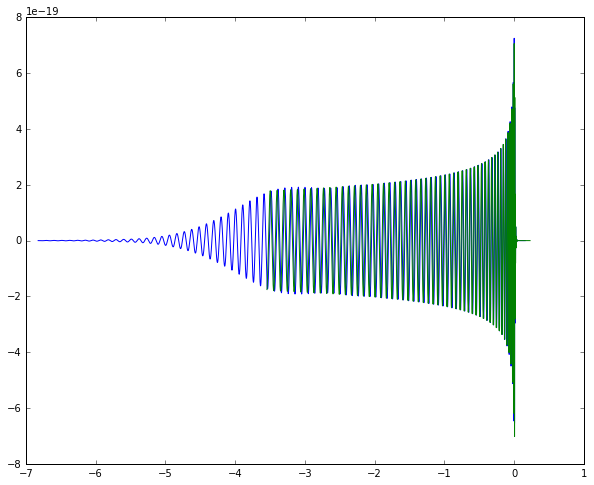

In [5]:
plt.figure( figsize=(10,8) )
plt.plot( t0 - t0[peakindex(hp0)], hp0, label='php2' )
plt.plot( t1 - t1[peakindex(hp1)], hp1, label='eob3' )

In [71]:
f0, hptilde0, hctilde0 = CallFDWaveform(approx="IMRPhenomPv2", chi1x=0., iota=0., eta=0.16, srate=1./0.05)

In [72]:
hptilde0_window = phenom.planck_taper( f0, 10., 11. ) * hptilde0
t0_ifft, hp0_ifft = phenom.myifft( f0, hptilde0 )

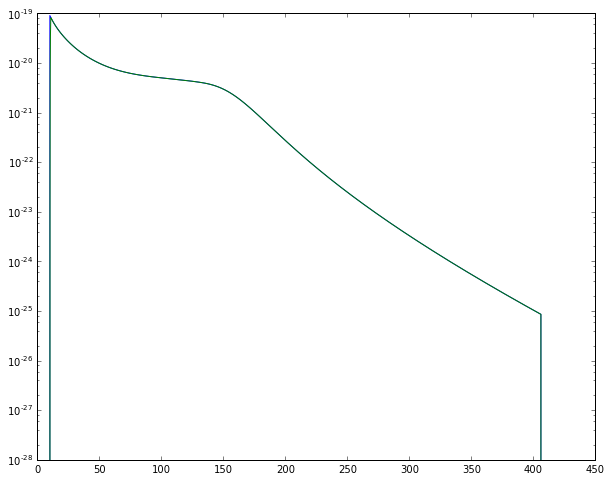

In [73]:
plt.figure( figsize=(10,8) )
plt.plot( f0, np.abs(hptilde0), label='php2' )
plt.plot( f0, np.abs(hptilde0_window), label='php2-window' )
plt.yscale('log')

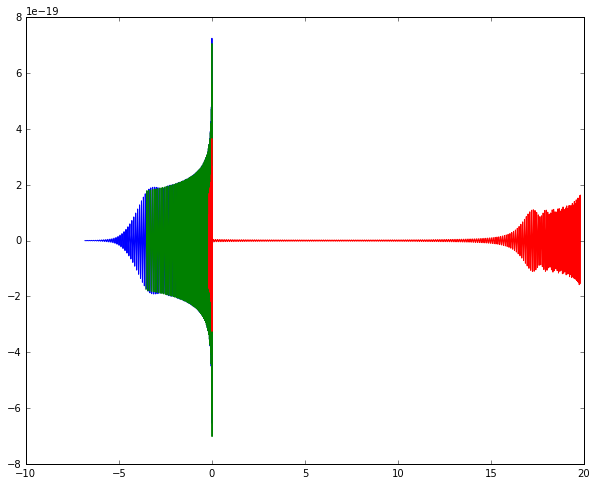

In [74]:
plt.figure( figsize=(10,8) )
plt.plot( t0 - t0[peakindex(hp0)], hp0, label='php2' )
plt.plot( t1 - t1[peakindex(hp1)], hp1, label='eob3' )
plt.plot( t0_ifft - t0_ifft[peakindex(hp0_ifft)], np.real(hp0_ifft), label='eob3' )
# plt.xlim(-1,1)

(-0.1, 0.1)

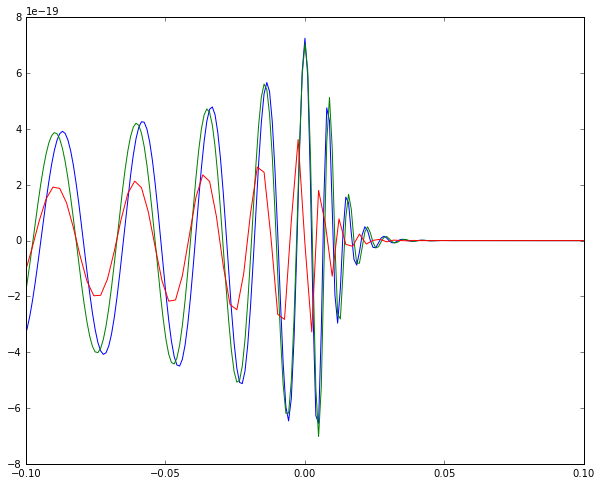

In [81]:
plt.figure( figsize=(10,8) )
plt.plot( t0 - t0[peakindex(hp0)], hp0, label='php2' )
plt.plot( t1 - t1[peakindex(hp1)], hp1, label='eob3' )
plt.plot( t0_ifft - t0_ifft[peakindex(hp0_ifft)], np.real(hp0_ifft) )
plt.xlim(-0.1,0.1)

In [76]:
from scipy.fftpack import fft, fftfreq, fftshift, ifft

def myifft_new(f, htilde, tshift):

    # compute times
    df = f[1] - f[0]
    N = len(htilde)
    dt = 1. / ( N * df )
    Tmax = N * dt

    t = np.arange( 0., Tmax, dt )

    # phase shift to avoid wrap around
    # minimum, non-zero frequ
    f0 = f[1]

#     extra_cycles = 4.
#     tshift = extra_cycles / f0 * dt

    # htilde *= exp( -1.j * 2. * pi * df *  tshift )
    htilde *= np.exp( -1.j * 2. * np.pi * f *  tshift )

    # compute ifft
    h = ifft( htilde ) / dt

    return t, h

In [77]:
hptilde0_window = phenom.planck_taper( f0, 10., 16. ) * hptilde0
# hptilde0_window =  hptilde0

t0_ifft, hp0_ifft = myifft_new( f0, hptilde0_window, 0)
t1_ifft, hp1_ifft = myifft_new( f0, hptilde0_window, 1.)
t2_ifft, hp2_ifft = myifft_new( f0, hptilde0_window, 2.)
t3_ifft, hp3_ifft = myifft_new( f0, hptilde0_window, 3.)

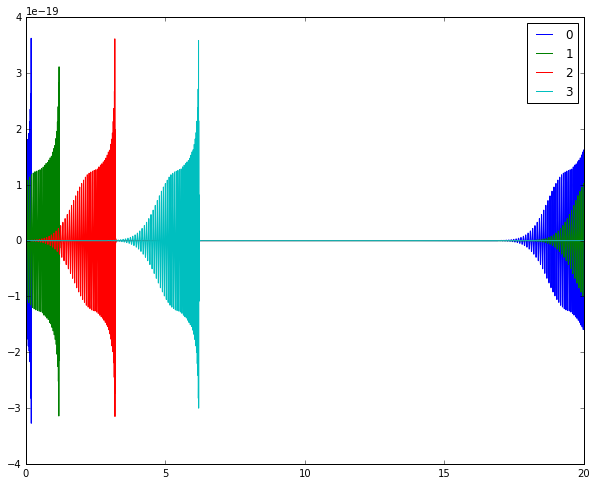

In [78]:
plt.figure( figsize=(10,8) )
plt.plot( t0_ifft, np.real(hp0_ifft), label='0' )
plt.plot( t1_ifft, np.real(hp1_ifft), label='1' )
plt.plot( t2_ifft, np.real(hp2_ifft), label='2' )
plt.plot( t3_ifft, np.real(hp3_ifft), label='3' )
# plt.xlim(-1,1)
plt.legend(loc='best')